98
[           N         X    Y         Z    C
0          0  8.540000  0.0  0.050235  0.0
1          1  8.540000  0.1  0.050235  0.0
2          2  8.439529  0.1  0.050235  0.0
3          3  8.439529  0.0  0.050235  0.0
4          4  8.540000  0.2  0.050235  0.0
...      ...       ...  ...       ...  ...
2662    2662  0.000000  2.7  0.050235  0.0
2663    2663  0.000000  2.8  0.050235  0.0
2664    2664  0.000000  2.9  0.050235  0.0
2665    2665  0.000000  3.0  0.050235  0.0
2666  [Name]       NaN  NaN       NaN  NaN

[2667 rows x 5 columns],            N         X    Y         Z    C
0          0  8.540000  0.0  0.050235  0.0
1          1  8.540000  0.1  0.050235  0.0
2          2  8.439529  0.1  0.050235  0.0
3          3  8.439529  0.0  0.050235  0.0
4          4  8.540000  0.2  0.050235  0.0
...      ...       ...  ...       ...  ...
2662    2662  0.000000  2.7  0.050235  0.0
2663    2663  0.000000  2.8  0.050235  0.0
2664    2664  0.000000  2.9  0.050235  0.0
2665    2665  0.000000  

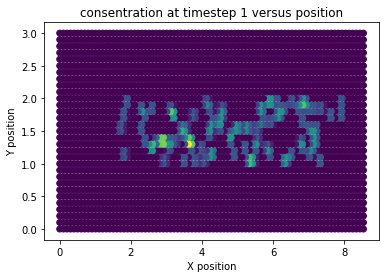

In [1]:
import pdb
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATA_FILE = "/home/david/dev/SmokeDetectorOptimization/exportUSLab.csv"
all_points = [[]]
with open(DATA_FILE, 'r') as infile:
    for line in infile:
        if "symmetry" in line:
            all_points.append([line])
        all_points[-1].append(line)  
       
#print(all_points[0])
WHICH = 1
print(len(all_points))

all_times = []

for i, time in enumerate(all_points[-3:-1]):
    #print(time)
    df = pd.read_csv(io.StringIO('\n'.join(time[4:])))#
    df = df.rename(columns={'Node Number': 'N',
                  ' X [ m ]' : 'X',
                  ' Y [ m ]' : 'Y',
                  ' Z [ m ]' : 'Z',
                  ' Particle Mass Concentration [ kg m^-3 ]' : 'C'})
    all_times.append(df)
    consentration = df['C'].values[0:-1]
    
    #hist,bin_edges = np.histogram(consentration)
    #print(hist, bin_edges)
    #print(sum(consentration))
    #plt.figure(figsize=[10,8])

    #plt.bar(bin_edges[:-1], hist, width = 0.5 * (bin_edges[1] - bin_edges[0]), color='#0504aa',alpha=0.7)
    #plt.xlim(min(bin_edges), max(bin_edges))
    #plt.grid(axis='y', alpha=0.75)
    #plt.xlabel('Value',fontsize=15)
    #plt.ylabel('Frequency',fontsize=15)
    #plt.xticks(fontsize=15)
    #plt.yticks(fontsize=15)
    #plt.ylabel('Frequency',fontsize=15)
    #plt.title('Normal Distribution Histogram',fontsize=15)
    # starting with a really bad iterative method
    max_val = np.max(consentration)

    #for num, row in df.iterrows():
    #   #print(row['X'])
    plt.cla()
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.title("consentration at timestep {} versus position".format(i))
    cb = plt.scatter(df['X'], df['Y'], c=df['C'] / max_val)
    #plt.colorbar(cb) # Add a colorbar to a plot
    plt.savefig("vis/consentration{:03d}.png".format(i))
    #plt.show()
    #df = pd.read_csv(DATA_FILE)

print(all_times) 
    

So the next thing we want to do is convert the output to a 2d space

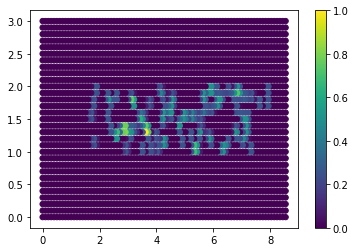

0


TypeError: only integer scalar arrays can be converted to a scalar index

In [11]:
import numpy as np
#pdb.set_trace()
# starting with a really bad iterative method
max_val = np.max(df['C'].values[0:-1])

#for num, row in df.iterrows():
#   #print(row['X'])
cb = plt.scatter(df['X'], df['Y'], c=df['C'] / max_val, s = 28)
plt.colorbar(cb) # Add a colorbar to a plot
plt.pause(.2)

consentrations = np.asarray([x['C'].values[:-1] for x in all_times])
alarmed = consentrations > 2e-21
nonzero = np.nonzero(alarmed.transpose())
for i in range(alarmed.shape[0]):
    print(i)
    same = i == nonzero[1]
    print(nonzero[same])
#print(nonzero[1])

In [5]:

def make_lookup(data_frame):
    """Returns a function which searches 
    the data at the sample nearest a given point
    """
    X = data_frame['X'].values[0:-1]
    Y = data_frame['Y'].values[0:-1]
    C = data_frame['C'].values[0:-1]
    best = np.argmax(C)
    XY = np.vstack((X,Y)).transpose()
    print(XY[best,:])
    def ret_func(xy):
        diff = xy - XY
        dist = np.linalg.norm(diff, axis=1)
        loc = np.argmin(dist)
        closest_c = C[loc]
        return closest_c
    return ret_func
ret_func = make_lookup(df)

print(ret_func(np.array([3.61694121, 1.29999995])))

[3.61694121 1.29999995]
9.953158640000001e-20


In [6]:
from scipy.optimize import minimize, rosen, rosen_der

BOUNDS = (0.2, 2.0) # constraints on inputs
INIT = (4,2)
res = minimize(ret_func, INIT, method='SLSQP', bounds=((0,8),(0, 3)))
print(res)


     fun: 1.86795105e-20
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 4
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([4., 2.])
